<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

### Imports

In [ ]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [ ]:
# the dataset is contained in the `data` folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lab-3 (1).02-validation-master/data/citibike_feb2014.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


### Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [ ]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

Max Trip duration is 766108 sec which seems like a long amount of time for a bike rental. 

In [ ]:
seconds = 766108
minutes = seconds / 60
print(minutes)


12768.466666666667


The mean trip duration is 15 minutes. 

In [ ]:
seconds = 874
minutes = seconds / 60
print(minutes)


14.566666666666666


Convert trip duration from seconds to hours.

In [ ]:

df['tripduration'] = df['tripduration'] / 3600

print(df['tripduration'])



0         0.106111
1         0.103333
2         0.164167
3         0.161944
4         0.061944
            ...   
224731    0.235556
224732    0.376389
224733    0.084444
224734    0.085556
224735    0.167500
Name: tripduration, Length: 224736, dtype: float64


In [ ]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,0.242922,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,1.523915,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,0.016667,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,0.100000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,0.151111,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,0.234722,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,212.807778,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


In [ ]:

tripduration_column = df['tripduration']
sorted_tripduration_column = tripduration_column.sort_values(ascending=False)

print(sorted_tripduration_column)


60093     212.807778
74460     163.943333
91489     162.578056
85316     161.305556
91100     141.597222
             ...    
22893       0.016667
141361      0.016667
18969       0.016667
156078      0.016667
53202       0.016667
Name: tripduration, Length: 224736, dtype: float64


Sum of trips greater than 3 hours. Remove those trips from dataframe. 

In [ ]:

count_tripduration_gt_3h = (df['tripduration'] > 3).sum()

print(count_tripduration_gt_3h)


675


In [ ]:

df = df[df['tripduration'] <= 3]

print(df)


In [ ]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224061.000000,224061.000000,224061.000000,224061.000000,224061.000000,224061.000000,224061.000000,224061.000000,224061.000000
mean,0.194363,439.170101,40.734369,-73.990386,440.699399,40.734224,-73.990521,18010.842338,1.154681
std,0.170309,335.681307,0.019023,0.011849,341.431051,0.019040,0.011917,1987.722510,0.436298
min,0.016667,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,0.099722,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,0.150833,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17976.000000,1.000000
75%,0.233611,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,2.985278,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


In [ ]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

Look at birth year column. Convert from object to float (initial calculation to create age column errored. View NANs.

In [ ]:
#used this site to force na's and convert column to numeric values https://pbpython.com/pandas_dtypes.html

# Replace non-numeric values with NaN
df['birth year'] = pd.to_numeric(df['birth year'], errors='coerce')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0.106111,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991.0,1
1,0.103333,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979.0,2
2,0.164167,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948.0,2
3,0.161944,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981.0,1
4,0.061944,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990.0,1


After cleaning age column and creating age feature, view the ages in descending order to make sure dead people aren't riding the bikes. 

In [ ]:
# Dropping NaN valaues
df = df.dropna(subset=['birth year'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0.106111,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991.0,1
1,0.103333,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979.0,2
2,0.164167,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948.0,2
3,0.161944,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981.0,1
4,0.061944,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990.0,1


In [ ]:
df['age'] = 2014 - df['birth year']
df['age']

<ipython-input-19-9edca216b557>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2014 - df['birth year']


0         23.0
1         35.0
2         66.0
3         33.0
4         24.0
          ... 
224731    38.0
224732    29.0
224733    46.0
224734    32.0
224735    54.0
Name: age, Length: 217398, dtype: float64

In [ ]:
df = df.sort_values('age', ascending=False)
df

Drop NaN's and people older than 90 from data set. 

In [ ]:
#verified ages greater than 90 years old not included
df = df[df['age'] <= 90]
df.head(10)

Gender: Found unique genders. Sum of unique genders. For data set where gender is 0, it is unknown. Removed genders that are unknown. 

In [ ]:
unique_genders = df['gender'].unique()
print("Unique genders:", unique_genders)


Unique genders: [2 1 0]


In [ ]:
gender_counts = df['gender'].value_counts()
print("Gender counts:\n", gender_counts)


Gender counts:
 1    175915
2     41335
0        14
Name: gender, dtype: int64


In [ ]:
df = df[df['gender'] != 0]


In [ ]:
#Checked genders again
unique_genders = df['gender'].unique()
print("Unique genders:", unique_genders)

Unique genders: [2 1]


In [ ]:
# Create dummies for 'gender'
dummies = pd.get_dummies(df['gender'], prefix=None, drop_first=True)

# Add dummies to original DataFrame
df = pd.concat([df, dummies], axis=1)

# Drop original 'gender' column
df.drop('gender', axis=1, inplace=True)


Subscribers column is an object. Convert to int and create dummy variables

In [ ]:
print(df['usertype'].dtype)


object


In [ ]:
df['usertype'] = df['usertype'].map({'Subscriber': 1, 'Customer': 0}).astype(int)


In [ ]:
df.head(1)

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,2006,2008,2009,2010,2012,2017,2021,2022,2023,3002
44876,0.220278,2014-02-06 16:57:41,2014-02-06 17:10:54,W Houston St & Hudson St,40.728739,-74.007488,470,W 20 St & 8 Ave,40.743453,-74.00004,...,0,0,0,0,0,0,0,0,0,0


-----

### What numeric columns shouldn't be treated as numeric?

**Answer:**

Anything treated as a category like gender, usertype, station id. 

### Dummify the `start station id` variable

In [ ]:
# Create dummies for 'start station id'
dummies = pd.get_dummies(df['start station id'], prefix=None, drop_first=True)

# Add dummies 
df = pd.concat([df, dummies], axis=1)

# Drop original 'start station id' column
df.drop('start station id', axis=1, inplace=True)

In [ ]:
df.head(1)

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,2006,2008,2009,2010,2012,2017,2021,2022,2023,3002
44876,0.220278,2014-02-06 16:57:41,2014-02-06 17:10:54,W Houston St & Hudson St,40.728739,-74.007488,470,W 20 St & 8 Ave,40.743453,-74.00004,...,0,0,0,0,0,0,0,0,0,0


### Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data to do this.

### Split your data into train and test sets

Look at the size of your data. What is a good proportion for your split? Justify your answer.

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`.

**NOTE:** When doing your train/test split, please use random seed 123.

In [ ]:
y = df['tripduration']
X = df.iloc[:, 12:]
 

### Fit a linear regression model in `sklearn` predicting `tripduration`

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [ ]:

# Create a linear regression object
reg = LinearRegression()
reg



LinearRegression()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=123)


In [ ]:
# Convert column names to string
X_train.columns = X_train.columns.astype(str)

#Fit LR
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
reg.score(X_train,y_train)

0.039394893054685576

In [ ]:
# Error message to change type to str 
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# Use the trained model to predict the trip duration for the test data
y_pred = reg.predict(X_test)


In [ ]:
y_pred

array([0.17408371, 0.20137405, 0.18172836, ..., 0.29372406, 0.18997955,
       0.17475128])

### Evaluate your model

Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

### The mean Predicted y is extremely close to the training y. This is a very good model to predict trip duration. The value of the MSE indicates the average squared error between the predicted trip duration and the actual trip duration. A smaller value of MSE indicates that the model is better at predicting the trip duration.

In [ ]:

mean_y_pred = np.mean(y_pred)
print(mean_y_pred)

0.18786004438499038


In [ ]:


mean_y_train = np.mean(y_train)
print(mean_y_train)


0.18790065391710964


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MSE: 0.025387301597470307


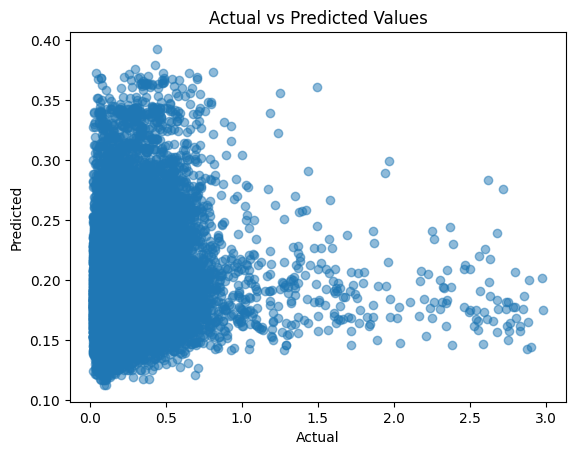

In [ ]:


# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
residuals = y_test - y_pred

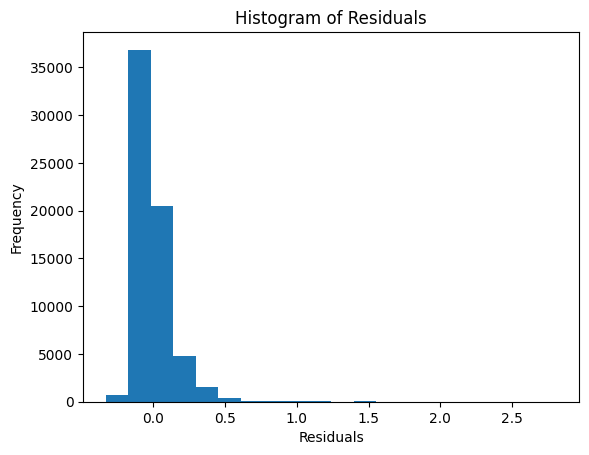

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of residuals named 'residuals'
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


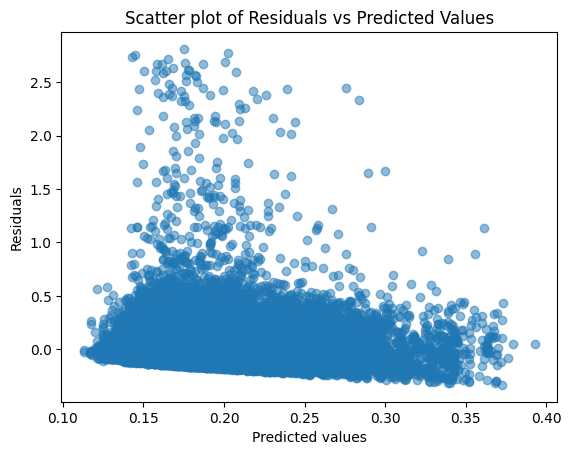

In [ ]:

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Scatter plot of Residuals vs Predicted Values')
plt.show()
